$$\def\data{\bf d_\rm{obs}}
\def\vec{\bf}
\def\m{\bf m}
\def\map{\bf m_{\text{MAP}}}
\def\postcov{\bf \Gamma_{\text{post}}}
\def\prcov{\bf \Gamma_{\text{prior}}}
\def\matrix{\bf}
\def\Hmisfit{\bf H_{\text{misfit}}}
\def\HT{\tilde{\bf H}_{\text{misfit}}}
\def\diag{diag}
\def\Vr{\matrix V_r}
\def\Wr{\matrix W_r}
\def\Ir{\matrix I_r}
\def\Dr{\matrix D_r}
\def\H{\matrix H}
$$ 
# Example: Bayesian quantification of parameter uncertainty:
## Estimating the (Gaussian) posterior pdf of the coefficient parameter field in an elliptic PDE

In this example we tackle the problem of quantifying the
uncertainty in the solution of an inverse problem governed by an
elliptic PDE via the Bayesian inference framework. 
Hence, we state the inverse problem as a
problem of statistical inference over the space of uncertain
parameters, which are to be inferred from data and a physical
model.  The resulting solution to the statistical inverse problem
is a posterior distribution that assigns to any candidate set of
parameter fields our belief (expressed as a probability) that a
member of this candidate set is the ``true'' parameter field that
gave rise to the observed data.

For simplicity, in what follows we give finite-dimensional expressions (i.e., after
discretization of the parameter space) for the Bayesian
formulation of the inverse problem.

### Bayes' Theorem:

The posterior probability distribution combines the prior pdf
$\pi_{\text{prior}}(\m)$ over the parameter space, which encodes
any knowledge or assumptions about the parameter space that we may
wish to impose before the data are considered, with a likelihood pdf
$\pi_{\text{like}}(\vec{d}_{\text{obs}} \; | \; \m)$, which explicitly
represents the probability that a given set of parameters $\m$
might give rise to the observed data $\vec{d}_{\text{obs}} \in
\mathbb{R}^m$, namely:

$
\begin{align}
\pi_{\text{post}}(\m | \data) \propto
\pi_{\text{prior}}(\m) \pi_{\text{like}}(\data | \m).
\end{align}
$

Note that infinite-dimensional analog of Bayes' formula requires the use Radon-Nikodym derivatives instead of probability density functions.

### Gaussian prior and noise:

#### The prior:

We consider a Gaussian prior with mean $\vec m_{\text prior}$ and covariance $\bf \Gamma_{\text{prior}}$. The covariance is given by the discretization of the inverse of differential operator $\mathcal{A}^{-2} = (-\gamma \Delta + \delta I)^{-2}$, where $\gamma$, $\delta > 0$ control the correlation length and the variance of the prior operator. This choice of prior ensures that it is a trace-class operator, guaranteeing bounded pointwise variance and a well-posed infinite-dimensional Bayesian inverse problem

#### The likelihood:

$
\data =  \bf{f}(\m) + \bf{e }, \;\;\;  \bf{e} \sim \mathcal{N}(\bf{0}, \bf \Gamma_{\text{noise}} )
$

$
\pi_{\text like}(\data \; | \; \m)  = \exp \left( - \tfrac{1}{2} (\bf{f}(\m) - \data)^T \bf \Gamma_{\text{noise}}^{-1} (\bf{f}(\m) - \data)\right)
$

Here $\bf f$ is the parameter-to-observable map that takes a parameter vector $\m$ and maps
it to the space observation vector $\data$.

#### The posterior:

$
\pi_{\text{post}}(\m \; | \; \data)  \propto \exp \left( - \tfrac{1}{2} \parallel \bf{f}(\m) - \data \parallel^{2}_{\bf  \Gamma_{\text{noise}}^{-1}} \! - \tfrac{1}{2}\parallel \m - \m_{\text prior} \parallel^{2}_{\bf \Gamma_{\text{prior}}^{-1}} \right)
$

### The Gaussian approximation of the posterior: $\mathcal{N}(\vec{\map},\bf \Gamma_{\text{post}})$

The mean of this posterior distribution, $\vec{\map}$, is the
parameter vector maximizing the posterior, and
is known as the maximum a posteriori (MAP) point.  It can be found
by minimizing the negative log of the posterior, which amounts to
solving a deterministic inverse problem) with appropriately weighted norms,

$
\map := \underset{\m}{\arg \min} \; \mathcal{J}(\m) \;:=\;
\Big( 
\frac{1}{2} \| \bf f(\m) - \data \|^2_{\bf \Gamma_{\text{noise}}^{-1}} 
+\frac{1}{2} \| \m -\m_{\text prior} \|^2_{\bf \Gamma_{\text{prior}}^{-1}} 
\Big).
$

The posterior covariance matrix is then given by the inverse of
the Hessian matrix of $\mathcal{J}$ at $\map$, namely

$
\bf \Gamma_{\text{post}} = \left(\Hmisfit(\map) + \bf \Gamma_{\text{prior}}^{-1} \right)^{-1}
$

#### The prior-preconditioned Hessian of the data misfit:

$
  \HT := \prcov^{1/2} \Hmisfit \prcov^{1/2}
$

#### The generalized eigenvalue problem:

$
 \Hmisfit \matrix{V} = \prcov^{-1} \matrix{V} \matrix{\Lambda},
$

where $\matrix{\Lambda} = diag(\lambda_i) \in \mathbb{R}^{n\times n}$
contains the generalized eigenvalues and the columns of $\matrix V\in
\mathbb R^{n\times n}$ the generalized eigenvectors such that 
$\matrix{V}^T \prcov^{-1} \matrix{V} = \matrix{I}$.

#### Randomized eigensolvers to construct the approximate spectral decomposition:  

When the generalized eigenvalues $\{\lambda_i\}$ decay rapidly, we can
extract a low-rank approximation of $\Hmisfit$ by retaining only the $r$
largest eigenvalues and corresponding eigenvectors,

$
 \HT = \prcov^{-1/2} \matrix{V}_r \matrix{\Lambda}_r \matrix{V}^T_r \prcov^{-1/2},
$

Here, $\matrix{V}_r \in \mathbb{R}^{n\times r}$ contains only the $r$
generalized eigenvectors of $\Hmisfit$ that correspond to the $r$ largest eigenvalues,
which are assembled into the diagonal matrix $\matrix{\Lambda}_r = \diag
(\lambda_i) \in \mathbb{R}^{r \times r}$.

#### The approximate posterior covariance::

Using the Sherman–Morrison–Woodbury formula, we write
$$
\begin{align}
  \notag \postcov = \left(\Hmisfit+ \prcov^{-1}\right)^{-1}
  = \prcov^{-1}-\matrix{V}_r \matrix{D}_r \matrix{V}_r^T +
  \mathcal{O}\left(\sum_{i=r+1}^{n} \frac{\lambda_i}{\lambda_i +
    1}\right),
\end{align}
$$

where $\matrix{D}_r :=\diag(\lambda_i/(\lambda_i+1)) \in
\mathbb{R}^{r\times r}$. The last term in this expression captures the
error due to truncation in terms of the discarded eigenvalues; this
provides a criterion for truncating the spectrum, namely that $r$ is
chosen such that $\lambda_r$ is small relative to 1. 

Therefore we can approximate the posterior covariance as

$$
\postcov \approx \prcov - \matrix{V}_r \matrix{D}_r
\matrix{V}_r^T
$$

#### Drawing samples from a Gaussian distribution with covariance $\H^{-1}$

Let $\bf x$ be a sample for the prior distribution, i.e. $\bf x \sim \mathcal{N}({\bf 0}, \prcov)$, then, using the low rank approximation of the posterior covariance, we compute a sample ${\bf v} \sim \mathcal{N}({\bf 0}, \H^{-1})$ as 
$$
  {\bf v} = \big\{ \Vr \big[ (\matrix{\Lambda}_r +
    \Ir)^{-1/2} - \Ir \big] \Vr^T\prcov^{-1}  + \bf I \big\} {\bf x} 
$$

## This tutorial shows:

- description of the inverse problem (the forward problem, the prior, and the misfit functional)
- convergence of the inexact Newton-CG algorithm
- low-rank-based approximation of the posterior covariance (built on a low-rank
approximation of the Hessian of the data misfit) 
- how to construct the low-rank approximation of the Hessian of the data misfit
- how to apply the inverse and square-root inverse Hessian to a vector efficiently
- samples from the Gaussian approximation of the posterior

## Goals:

By the end of this notebook, you should be able to:

- understand the Bayesian inverse framework
- visualise and understand the results
- modify the problem and code

## Mathematical tools used:

- Finite element method
- Derivation of gradiant and Hessian via the adjoint method
- inexact Newton-CG
- Armijo line search
- Bayes' formula
- randomized eigensolvers

## List of software used:

- <a href="http://fenicsproject.org/">FEniCS</a>, a parallel finite element element library for the discretization of partial differential equations
- <a href="http://www.mcs.anl.gov/petsc/">PETSc</a>, for scalable and efficient linear algebra operations and solvers
- <a href="http://matplotlib.org/">Matplotlib</a>, A great python package that I used for plotting many of the results
- <a href="http://www.numpy.org/">Numpy</a>, A python package for linear algebra.  While extensive, this is mostly used to compute means and sums in this notebook.

## 1. Load modules

In [ ]:
import dolfin as dl
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import hippylib as hp
from hippylib import nb


import logging
logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
dl.set_log_active(False)

np.random.seed(seed=1)

## 2. Generate the true parameter

This function generates a random field with a prescribed anysotropic covariance function.

In [2]:
def true_model(prior):
    noise = dl.Vector()
    prior.init_vector(noise,"noise")
    hp.parRandom.normal(1., noise)
    mtrue = dl.Vector()
    prior.init_vector(mtrue, 0)
    prior.sample(noise,mtrue)
    return mtrue

## 3. Set up the mesh and finite element spaces

We compute a two dimensional mesh of a unit square with nx by ny elements.
We define a P2 finite element space for the *state* and *adjoint* variable and P1 for the *parameter*.

In [3]:
ndim = 2
nx = 64
ny = 64
mesh = dl.UnitSquareMesh(nx, ny)
Vh2 = dl.FunctionSpace(mesh, 'Lagrange', 2)
Vh1 = dl.FunctionSpace(mesh, 'Lagrange', 1)
Vh = [Vh2, Vh1, Vh2]
print( "Number of dofs: STATE={0}, PARAMETER={1}, ADJOINT={2}".format(
    Vh[hp.STATE].dim(), Vh[hp.PARAMETER].dim(), Vh[hp.ADJOINT].dim()) )

Number of dofs: STATE=16641, PARAMETER=4225, ADJOINT=16641


## 4. Set up the forward problem

To set up the forward problem we use the `PDEVariationalProblem` class, which requires the following inputs
- the finite element spaces for the state, parameter, and adjoint variables `Vh`
- the pde in weak form `pde_varf`
- the boundary conditions `bc` for the forward problem and `bc0` for the adjoint and incremental problems.

The `PDEVariationalProblem` class offer the following functionality:
- solving the forward/adjoint and incremental problems
- evaluate first and second partial derivative of the forward problem with respect to the state, parameter, and adojnt variables.

In [4]:
def u_boundary(x, on_boundary):
    return on_boundary and ( x[1] < dl.DOLFIN_EPS or x[1] > 1.0 - dl.DOLFIN_EPS)

u_bdr = dl.Expression("x[1]", degree=1)
u_bdr0 = dl.Constant(0.0)
bc = dl.DirichletBC(Vh[hp.STATE], u_bdr, u_boundary)
bc0 = dl.DirichletBC(Vh[hp.STATE], u_bdr0, u_boundary)

f = dl.Constant(0.0)
    
def pde_varf(u,m,p):
    return dl.exp(m)*dl.inner(dl.nabla_grad(u), dl.nabla_grad(p))*dl.dx - f*p*dl.dx
    
pde = hp.PDEVariationalProblem(Vh, pde_varf, bc, bc0, is_fwd_linear=True)

## 4. Set up the prior

To obtain the synthetic true paramter $a_{\rm true}$ we generate a realization of a Gaussian random field with zero average and covariance matrix $\mathcal{C} = \widetilde{\mathcal{A}}^{-2}$, where $\widetilde{\mathcal{A}}$ is a differential operator of the form
$$ \widetilde{\mathcal{A}} = \gamma {\rm div}\, \Theta\, {\rm grad} + \delta I. $$
Here $\Theta$ is an s.p.d. anisotropic tensor of the form
$$ \Theta =
\begin{bmatrix}
\theta_1 \sin(\alpha)^2 & (\theta_1-\theta_2) \sin(\alpha) \cos{\alpha} \\
(\theta_1-\theta_2) \sin(\alpha) \cos{\alpha} & \theta_2 \cos(\alpha)^2.
\end{bmatrix} $$

Prior regularization: (delta_x - gamma*Laplacian)^order: delta=0.5, gamma=0.1, order=2


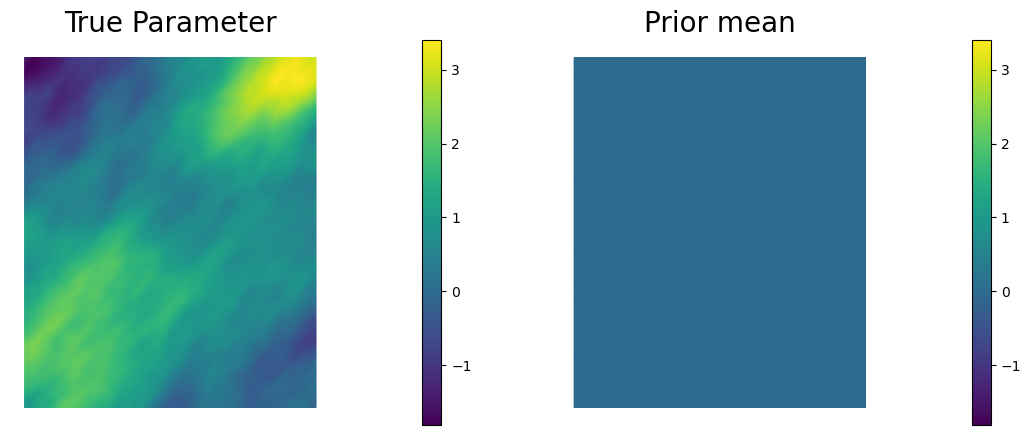

In [5]:
gamma = .1
delta = .5
    
theta0 = 2.
theta1 = .5
alpha  = math.pi/4
    
anis_diff = dl.CompiledExpression(hp.ExpressionModule.AnisTensor2D(), degree = 1)
anis_diff.set(theta0, theta1, alpha)

prior = hp.BiLaplacianPrior(Vh[hp.PARAMETER], gamma, delta, anis_diff, robin_bc=True)
mtrue = true_model(prior)
      
print("Prior regularization: (delta_x - gamma*Laplacian)^order: delta={0}, gamma={1}, order={2}".format(delta, gamma,2))    
            
objs = [dl.Function(Vh[hp.PARAMETER],mtrue), dl.Function(Vh[hp.PARAMETER],prior.mean)]
mytitles = ["True Parameter", "Prior mean"]
nb.multi1_plot(objs, mytitles)
plt.show()

## 5. Set up the misfit functional and generate synthetic observations

To setup the observation operator, we generate *ntargets* random locations where to evaluate the value of the state.

To generate the synthetic observation, we first solve the forward problem using the true parameter $m_{\rm true}$. Synthetic observations are obtained by perturbing the state variable at the observation points with a random gaussian noise.
*rel_noise* is the signal to noise ratio.

Number of observation points: 300


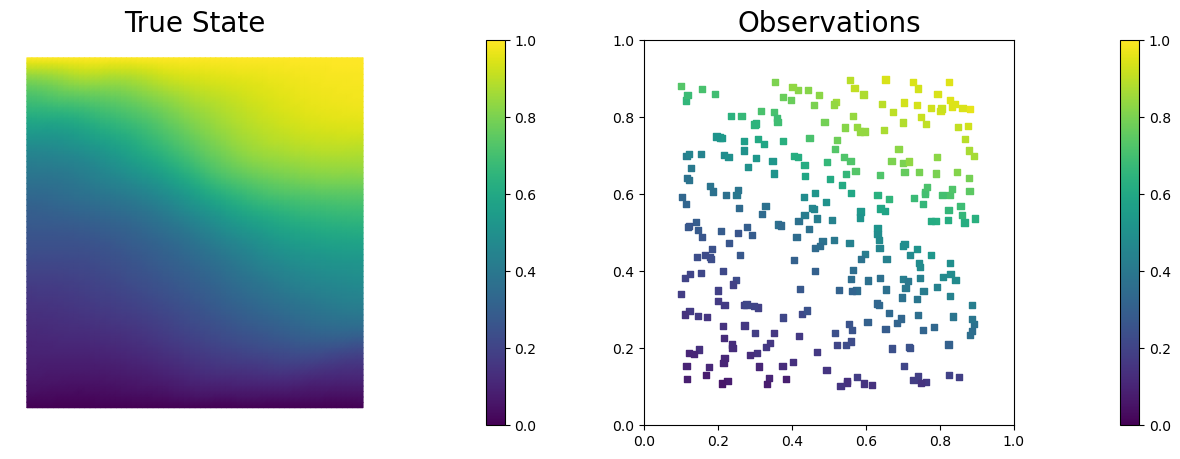

In [6]:
ntargets = 300
rel_noise = 0.01


targets = np.random.uniform(0.1,0.9, [ntargets, ndim] )
print( "Number of observation points: {0}".format(ntargets) )
B = hp.assemblePointwiseObservation(Vh[hp.STATE], targets)
misfit = hp.DiscreteStateObservation(B)

utrue = pde.generate_state()
x = [utrue, mtrue, None]
pde.solveFwd(x[hp.STATE], x)
misfit.B.mult(x[hp.STATE], misfit.d)
MAX = misfit.d.norm("linf")
noise_std_dev = rel_noise * MAX
hp.parRandom.normal_perturb(noise_std_dev, misfit.d)
misfit.noise_variance = noise_std_dev*noise_std_dev

vmax = max( utrue.max(), misfit.d.max() )
vmin = min( utrue.min(), misfit.d.min() )

plt.figure(figsize=(15,5))
nb.plot(dl.Function(Vh[hp.STATE], utrue), mytitle="True State", subplot_loc=121, vmin=vmin, vmax=vmax)
nb.plot_pts(targets, misfit.d, mytitle="Observations", subplot_loc=122, vmin=vmin, vmax=vmax)
plt.show()

## 6. Set up the model and test gradient and Hessian

The model is defined by three component:
- the `PDEVariationalProblem` `pde` which provides methods for the solution of the forward problem, adjoint problem, and incremental forward and adjoint problems.
- the `Prior` `prior` which provides methods to apply the regularization (*precision*) operator to a vector or to apply the prior covariance operator (i.e. to solve linear system with the regularization operator)
- the `Misfit` `misfit` which provides methods to compute the cost functional and its partial derivatives with respect to the state and parameter variables.

To test gradient and the Hessian of the model we use forward finite differences.

(yy, H xx) - (xx, H yy) =  -5.602532331574e-15


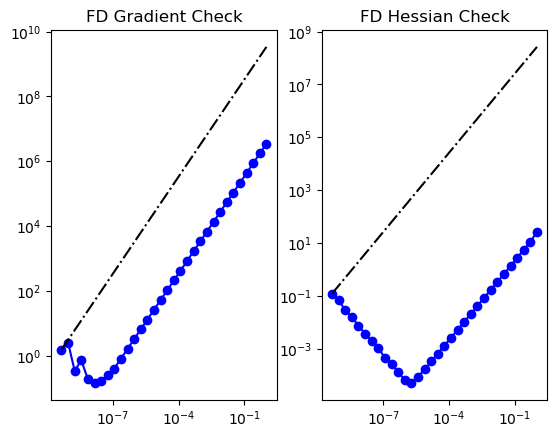

In [7]:
model = hp.Model(pde, prior, misfit)

m0 = dl.interpolate(dl.Expression("sin(x[0])", degree=5), Vh[hp.PARAMETER])
_ = hp.modelVerify(model, m0.vector())

## 7. Compute the MAP point

We used the globalized Newtown-CG method to compute the MAP point.


It  cg_it cost            misfit          reg             (g,dm)          ||g||L2        alpha          tolcg         
  1   2    4.873827e+03    4.872160e+03    1.666960e+00   -3.712701e+04   7.107403e+04   1.000000e+00   5.000000e-01
  2   2    1.232924e+03    1.228194e+03    4.730003e+00   -7.292587e+03   2.912717e+04   1.000000e+00   5.000000e-01
  3   4    2.822056e+02    2.727932e+02    9.412419e+00   -1.893607e+03   9.239403e+03   1.000000e+00   3.605508e-01
  4   1    2.681692e+02    2.587365e+02    9.432716e+00   -2.810182e+01   3.973742e+03   1.000000e+00   2.364527e-01
  5   6    2.012689e+02    1.894693e+02    1.179965e+01   -1.378519e+02   2.133946e+03   1.000000e+00   1.732751e-01
  6   6    1.866243e+02    1.743646e+02    1.225968e+01   -2.862032e+01   1.346611e+03   1.000000e+00   1.376467e-01
  7  15    1.771796e+02    1.558776e+02    2.130200e+01   -3.867562e+01   9.496358e+02   1.000000e+00   1.155907e-01
  8   1    1.695012e+02    1.481907e+02    2.131052e+01   -1.

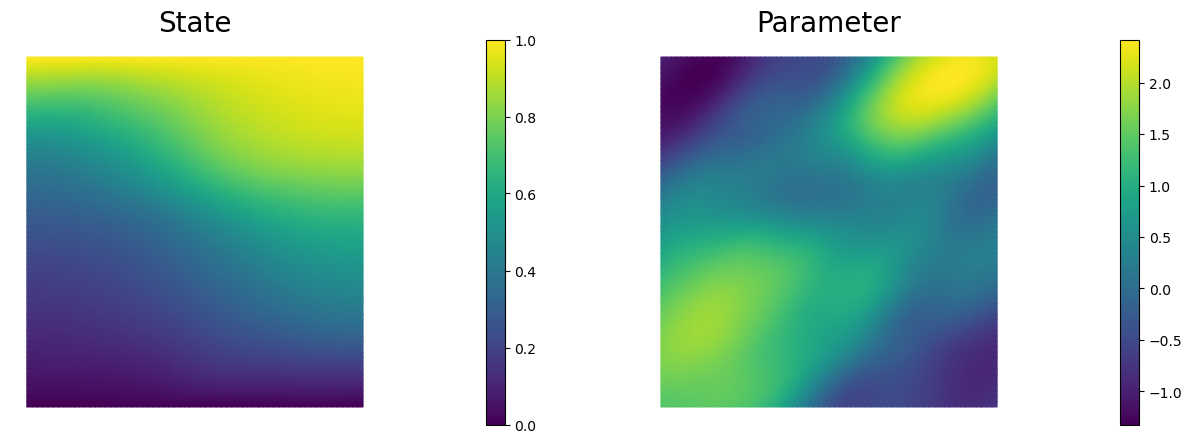

In [8]:
m = prior.mean.copy()
solver = hp.ReducedSpaceNewtonCG(model)
solver.parameters["rel_tolerance"] = 1e-6
solver.parameters["abs_tolerance"] = 1e-12
solver.parameters["max_iter"]      = 25
solver.parameters["GN_iter"] = 5
solver.parameters["globalization"] = "LS"
solver.parameters["LS"]["c_armijo"] = 1e-4

    
x = solver.solve([None, m, None])
    
if solver.converged:
    print( "\nConverged in ", solver.it, " iterations.")
else:
    print( "\nNot Converged")

print( "Termination reason: ", solver.termination_reasons[solver.reason] )
print( "Final gradient norm: ", solver.final_grad_norm )
print( "Final cost: ", solver.final_cost )

plt.figure(figsize=(15,5))
nb.plot(dl.Function(Vh[hp.STATE], x[hp.STATE]), subplot_loc=121,mytitle="State")
nb.plot(dl.Function(Vh[hp.PARAMETER], x[hp.PARAMETER]), subplot_loc=122,mytitle="Parameter")
plt.show()

## 8. Compute the low rank Gaussian approximation of the posterior
We used the *double pass* algorithm to compute a low-rank decomposition of the Hessian Misfit.
In particular, we solve

$$ \Hmisfit {\bf u} = \lambda \prcov^{-1} {\bf u}. $$

The Figure shows the largest *k* generalized eigenvectors of the Hessian misfit.
The effective rank of the Hessian misfit is the number of eigenvalues above the red line (y=1).
The effective rank is independent of the mesh size.

Single/Double Pass Algorithm. Requested eigenvectors: 50; Oversampling 20.


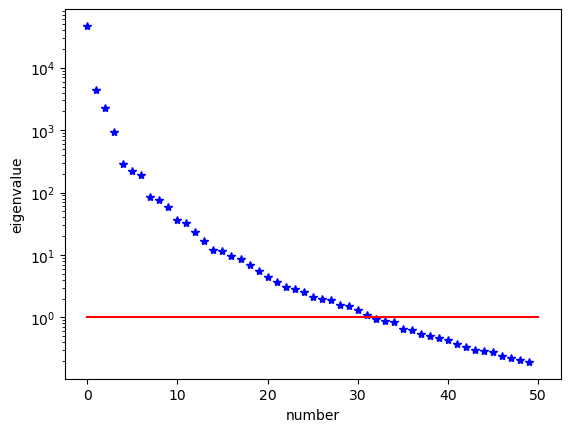

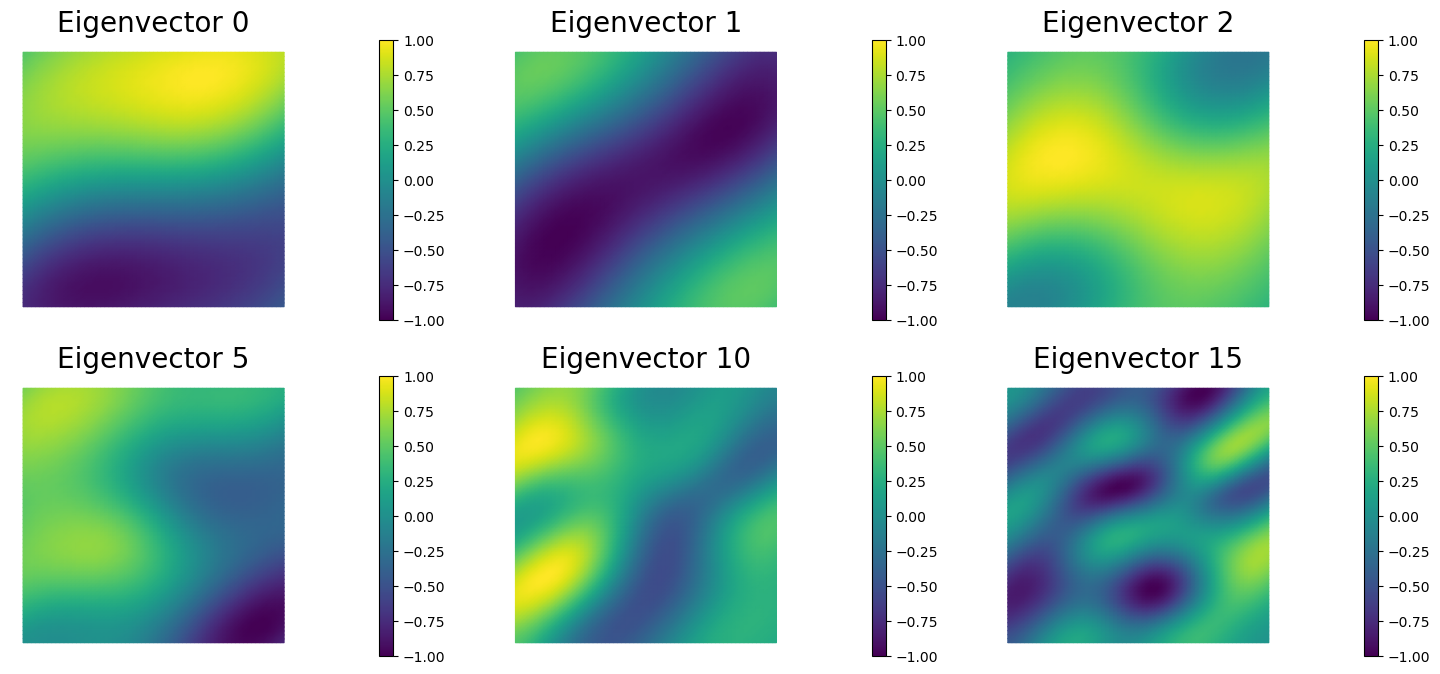

In [9]:
model.setPointForHessianEvaluations(x, gauss_newton_approx=False)
Hmisfit = hp.ReducedHessian(model, misfit_only=True)
k = 50
p = 20
print( "Single/Double Pass Algorithm. Requested eigenvectors: {0}; Oversampling {1}.".format(k,p) )

Omega = hp.MultiVector(x[hp.PARAMETER], k+p)
hp.parRandom.normal(1., Omega)
d, U = hp.doublePassG(Hmisfit, prior.R, prior.Rsolver, Omega, k)

nu = hp.GaussianLRPosterior(prior, d, U)
nu.mean = x[hp.PARAMETER]

plt.plot(range(0,k), d, 'b*', range(0,k+1), np.ones(k+1), '-r')
plt.yscale('log')
plt.xlabel('number')
plt.ylabel('eigenvalue')

nb.plot_eigenvectors(Vh[hp.PARAMETER], U, mytitle="Eigenvector", which=[0,1,2,5,10,15])

## 9. Prior and posterior pointwise variance fields

Posterior trace 8.094518e-01; Prior trace 1.797385e+00; Correction trace 9.879333e-01


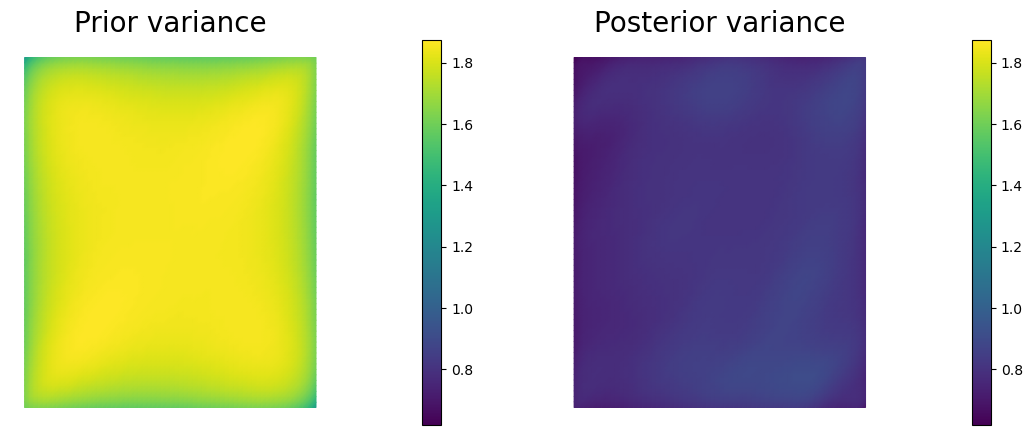

In [10]:
compute_trace = True
if compute_trace:
    post_tr, prior_tr, corr_tr = nu.trace(method="Randomized", r=200)
    print( "Posterior trace {0:5e}; Prior trace {1:5e}; Correction trace {2:5e}".format(post_tr, prior_tr, corr_tr) )
post_pw_variance, pr_pw_variance, corr_pw_variance = nu.pointwise_variance(method="Randomized", r=200)

objs = [dl.Function(Vh[hp.PARAMETER], pr_pw_variance),
        dl.Function(Vh[hp.PARAMETER], post_pw_variance)]
mytitles = ["Prior variance", "Posterior variance"]
nb.multi1_plot(objs, mytitles, logscale=False)
plt.show()

## 10. Generate samples from Prior and Laplace Approximation Posterior

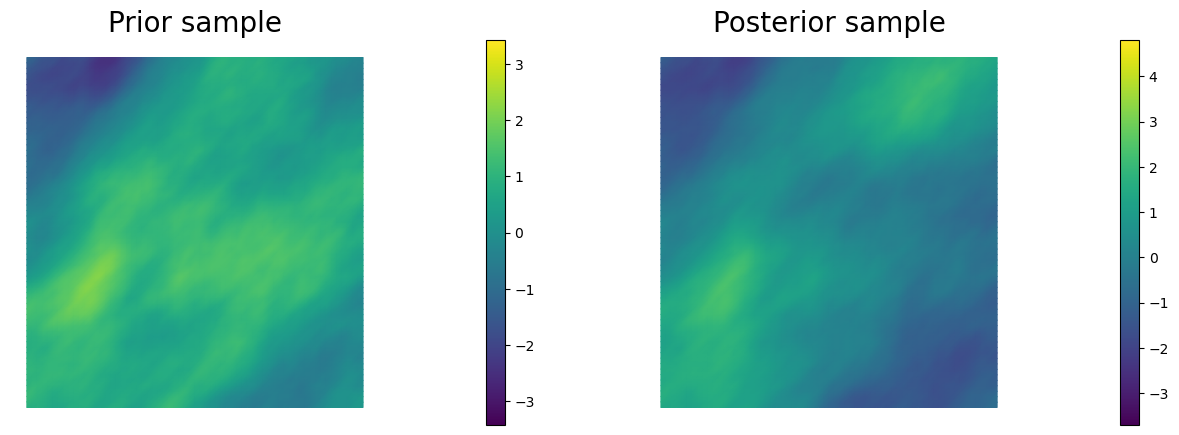

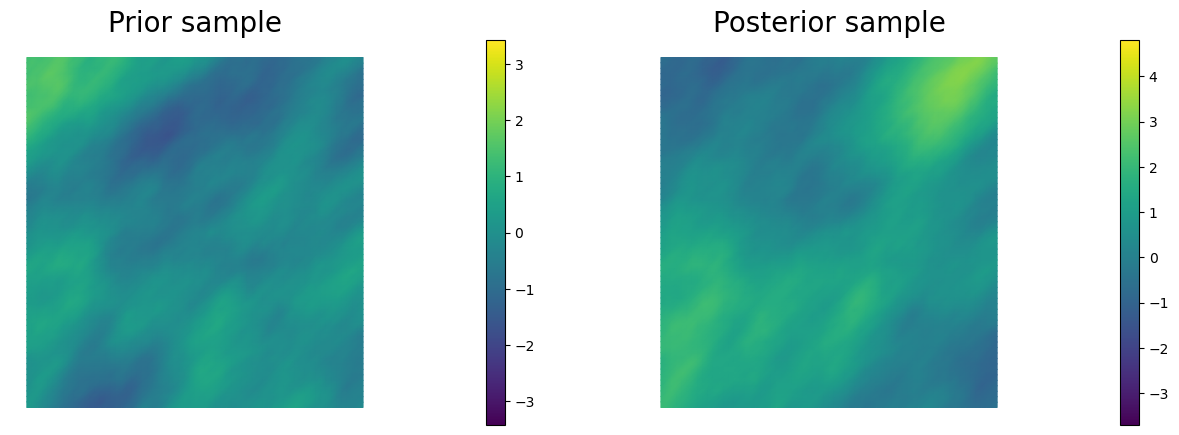

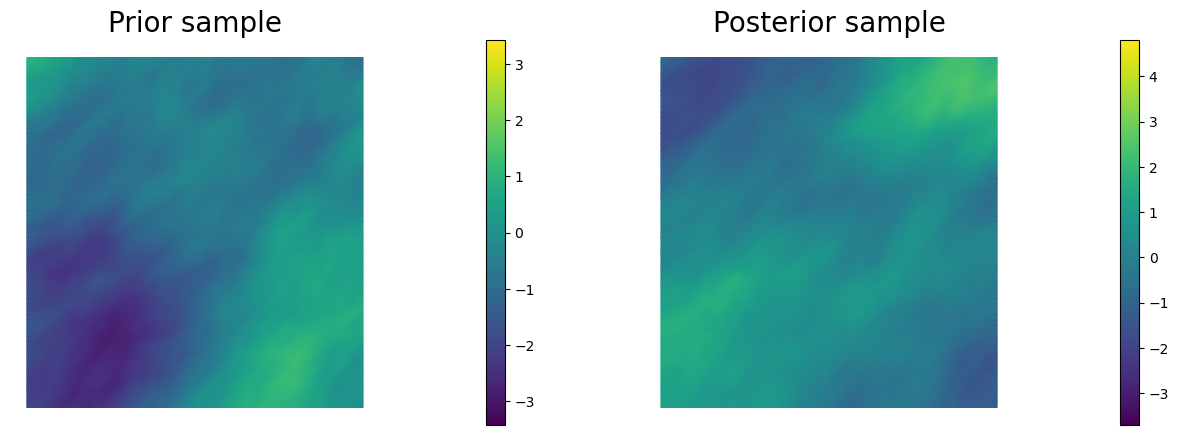

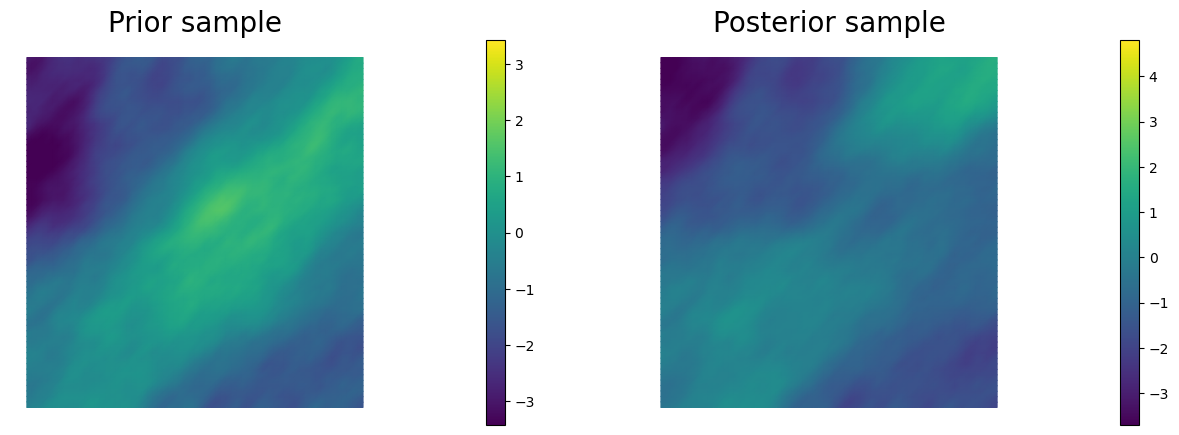

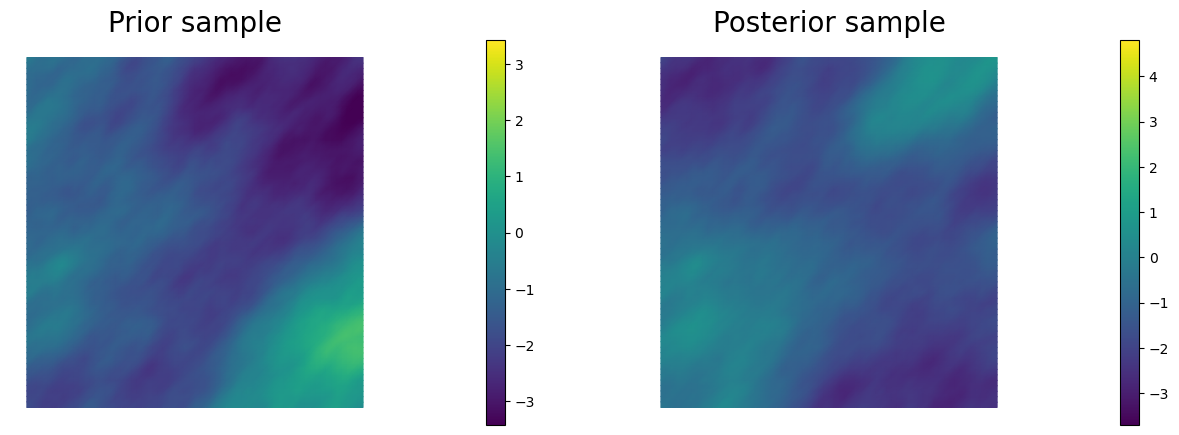

In [11]:
nsamples = 5
noise = dl.Vector()
nu.init_vector(noise,"noise")
s_prior = dl.Function(Vh[hp.PARAMETER], name="sample_prior")
s_post = dl.Function(Vh[hp.PARAMETER], name="sample_post")

pr_max   =  2.5*math.sqrt( pr_pw_variance.max() ) + prior.mean.max()
pr_min   = -2.5*math.sqrt( pr_pw_variance.max() ) + prior.mean.min()
ps_max   =  2.5*math.sqrt( post_pw_variance.max() ) + nu.mean.max()
ps_min   = -2.5*math.sqrt( post_pw_variance.max() ) + nu.mean.min()

for i in range(nsamples):
    hp.parRandom.normal(1., noise)
    nu.sample(noise, s_prior.vector(), s_post.vector())
    plt.figure(figsize=(15,5))
    nb.plot(s_prior, subplot_loc=121,mytitle="Prior sample", vmin=pr_min, vmax=pr_max)
    nb.plot(s_post, subplot_loc=122,mytitle="Posterior sample", vmin=ps_min, vmax=ps_max)
    plt.show()

## 11. Define a quantify of interest

As a quantity of interest, we consider the flux through the bottom boundary:

$$ q(m) = \int_{\Gamma_b} e^m \nabla u \cdot \mathbf{n} \, ds, $$

where the state variable $u$ denotes the pressure, and $\mathbf{n}$ is the unit normal vector to $\Gamma_b$.

In [12]:
class FluxQOI(object):
    def __init__(self, Vh, dsGamma):
        self.Vh = Vh
        self.dsGamma = dsGamma
        self.n = dl.Constant((0.,1.))#dl.FacetNormal(Vh[STATE].mesh())
        
        self.u = None
        self.m = None
        self.L = {}
        
    def form(self, x):
        return dl.exp(x[hp.PARAMETER])*dl.dot( dl.grad(x[hp.STATE]), self.n)*self.dsGamma
    
    def eval(self, x):
        u = hp.vector2Function(x[hp.STATE], self.Vh[hp.STATE])
        m = hp.vector2Function(x[hp.PARAMETER], self.Vh[hp.PARAMETER])
        return dl.assemble(self.form([u,m]))

class GammaBottom(dl.SubDomain):
    def inside(self, x, on_boundary):
        return ( abs(x[1]) < dl.DOLFIN_EPS )

GC = GammaBottom()
marker = dl.MeshFunction("size_t", mesh,mesh.topology().dim()-1)
marker.set_all(0)
GC.mark(marker, 1)
dss = dl.Measure("ds", subdomain_data=marker)
qoi = FluxQOI(Vh,dss(1))

## 12. Compute posterior expectations using MCMC

In [13]:
noise = dl.Vector()
nu.init_vector(noise, "noise")
hp.parRandom.normal(1., noise)
pr_s = model.generate_vector(hp.PARAMETER)
post_s = model.generate_vector(hp.PARAMETER)
nu.sample(noise, pr_s, post_s, add_mean=True)

kernel = hp.gpCNKernel(model, nu)
kernel.parameters["s"] = 0.3
chain = hp.MCMC(kernel)
chain.parameters["burn_in"] = 1000
chain.parameters["number_of_samples"] = 10000
chain.parameters["print_progress"] = 10            
tracer = hp.QoiTracer(chain.parameters["number_of_samples"])

n_accept = chain.run(post_s, qoi, tracer)

print( "Number accepted = {0}".format(n_accept) )
print( "E[q] = {0}".format(chain.sum_q/float(chain.parameters["number_of_samples"])) )

Burn 1000 samples
10.0 % completed, Acceptance ratio 49.0 %
20.0 % completed, Acceptance ratio 41.0 %
30.0 % completed, Acceptance ratio 37.3 %
40.0 % completed, Acceptance ratio 32.8 %
50.0 % completed, Acceptance ratio 30.0 %
60.0 % completed, Acceptance ratio 29.8 %
70.0 % completed, Acceptance ratio 28.6 %
80.0 % completed, Acceptance ratio 26.1 %
90.0 % completed, Acceptance ratio 25.1 %
100.0 % completed, Acceptance ratio 24.6 %
Generate 10000 samples
10.0 % completed, Acceptance ratio 13.1 %
20.0 % completed, Acceptance ratio 13.7 %
30.0 % completed, Acceptance ratio 24.3 %
40.0 % completed, Acceptance ratio 28.1 %
50.0 % completed, Acceptance ratio 32.0 %
60.0 % completed, Acceptance ratio 32.7 %
70.0 % completed, Acceptance ratio 32.9 %
80.0 % completed, Acceptance ratio 33.5 %
90.0 % completed, Acceptance ratio 33.1 %
100.0 % completed, Acceptance ratio 33.3 %
Number accepted = 3334
E[q] = 2.977387407005194


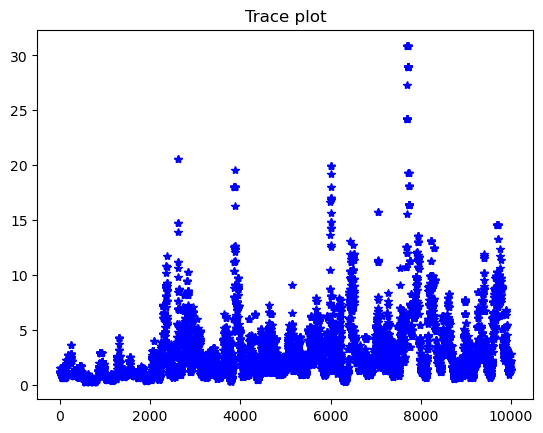

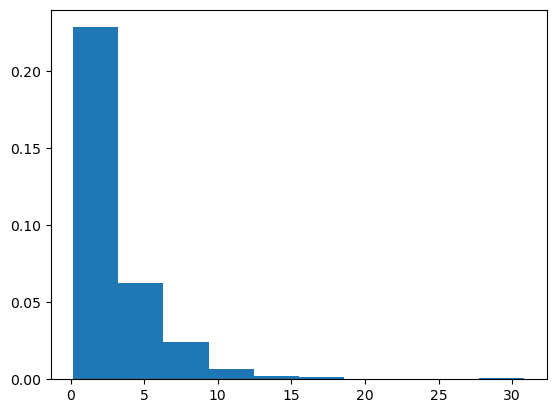

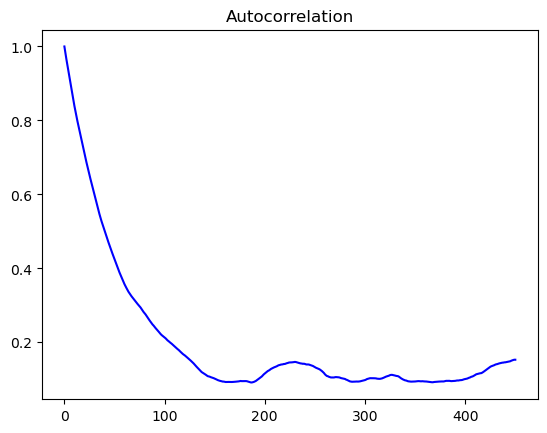

Integrated autocorrelation time 181.39949659248072


In [16]:
def acorr(mean_free_samples, lag, norm = 1):
    return (mean_free_samples[:mean_free_samples.size-lag]*mean_free_samples[lag:]).ravel().mean() / norm

def acorr_vs_lag(samples, max_lag = 500):
    mean = samples.mean()
    mean_free_samples = samples - mean
    
    norm = acorr(mean_free_samples, 0)
    
    lags = np.arange(0,max_lag+1)
    acorrs = np.ones(max_lag+1)
    
    for lag in lags[1:]:
        acorrs[lag] = acorr(mean_free_samples, lag, norm)
        
    return lags, acorrs

q = tracer.data

plt.figure()
plt.plot(q, '*b')
plt.title("Trace plot")
plt.show()

plt.figure()
plt.hist(q, density=True)
plt.show()

plt.figure()
max_lag = 450
lags, acorrs = acorr_vs_lag(q, max_lag)
plt.plot(lags, acorrs, '-b') 
plt.title("Autocorrelation")
plt.show()

integrated_corr_time = 1. + 2.* np.max( acorrs.cumsum() ) 
print( "Integrated autocorrelation time", integrated_corr_time )

Copyright (c) 2016-2018, The University of Texas at Austin & University of California, Merced.<br>
Copyright (c) 2019-2022, The University of Texas at Austin, University of California--Merced, Washington University in St. Louis.<br>
Copyright (c) 2023-, The University of Texas at Austin, University of California--Merced.<br>
All Rights reserved.<br>
See file COPYRIGHT for details.

This file is part of the hIPPYlib library. For more information and source code
availability see https://hippylib.github.io.

hIPPYlib is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License (as published by the Free Software Foundation) version 2.0 dated June 1991.